- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [42]:
data1 = pd.read_csv('Pizza.csv')
data1.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84

# Question1-2-3 : ACP

## Extraction des colonnes

In [44]:
df=data1[['mois','prot','fat','ash','sodium','carb','cal']]

In [145]:
df

mois   prot    fat   ash  sodium   carb   cal
0    27.82  21.43  44.87  5.11    1.77   0.77  4.93
1    28.49  21.26  43.89  5.34    1.79   1.02  4.84
2    28.35  19.99  45.78  5.08    1.63   0.80  4.95
3    30.55  20.15  43.13  4.79    1.61   1.38  4.74
4    30.49  21.28  41.65  4.82    1.64   1.76  4.67
5    31.14  20.23  42.31  4.92    1.65   1.40  4.67
6    31.21  20.97  41.34  4.71    1.58   1.77  4.63
7    28.76  21.41  41.60  5.28    1.75   2.95  4.72
8    28.22  20.48  45.10  5.02    1.71   1.18  4.93
9    27.72  21.19  45.29  5.16    1.66   0.64  4.95
10   27.35  21.20  45.59  4.94    1.65   0.92  4.98
11   26.98  21.20  45.03  5.15    1.67   1.64  4.97
12   28.70  20.00  45.12  4.93    1.56   1.25  4.91
13   30.91  19.65  42.45  4.81    1.65   2.81  4.72
14   30.91  20.77  42.03  4.90    1.61   1.39  4.67
15   30.83  17.88  44.33  5.26    1.76   1.70  4.77
16   32.73  20.06  39.74  5.24    1.69   2.23  4.47
17   34.58  17.53  40.87  5.05    1.61   1.97  4.46
18   31.80  20.35  40.44  5.43    1.61   1.98  4.53
19   31.02  19.05  42.29  5.27    1.71   2.37  4.66
20   27.02  19.56  47.20  4.95    1.65   1.27  5.08
21   27.78  20.01  45.59  4.97    1.70   1.65  4.97
22   30.88  20.58  42.26  4.96    1.63   1.32  4.68
23   32.20  19.25  43.42  4.62    1.50   0.51  4.70
24   33.19  18.05  41.88  5.22    1.70   1.66  4.56
25   30.43  19.78  44.20  4.80    1.61   0.79  4.80
26   28.93  19.99  45.20  4.78    1.62   1.10  4.91
27   30.41  18.71  43.99  4.86    1.62   2.03  4.79
28   29.62  21.10  43.37  5.05    1.69   0.86  4.78
29   49.57  13.70  29.07  3.62    1.10   4.04  3.33
..     ...    ...    ...   ...     ...    ...   ...
270  47.60  10.43  15.18  2.32    0.56  24.47  2.76
271  46.84   9.91  15.50  2.27    0.57  25.48  2.81
272  46.10   9.87  15.97  2.19    0.53  25.87  2.87
273  47.84  10.16  14.56  2.27    0.54  25.17  2.72
274  45.86  10.50  17.07  2.33    0.61  24.24  2.93
275  46.55  10.75  16.72  2.24    0.61  23.74  2.88
276  46.13  10.71  17.24  2.36    0.61  23.56  2.92
277  48.58   9.76  16.01  2.30    0.60  23.35  2.77
278  44.76  12.91  15.56  2.34    0.61  24.43  2.89
279  46.13  10.84  13.99  2.38    0.64  26.66  2.76
280  47.43  10.45  16.50  2.35    0.61  23.27  2.83
281  46.22  11.26  15.93  2.47    0.63  24.12  2.85
282  45.20  10.67  16.38  2.44    0.60  25.31  2.91
283  47.05  10.46  15.16  2.34    0.64  24.99  2.78
284  43.45  10.81  19.49  2.51    0.68  23.74  3.14
285  47.74  10.23  16.31  2.50    0.67  23.22  2.81
286  45.17  10.42  17.20  2.34    0.61  24.87  2.96
287  44.77  10.52  16.12  2.44    0.66  26.15  2.92
288  47.91  10.75  16.00  2.40    0.64  22.94  2.79
289  45.69  10.23  16.50  2.30    0.59  25.28  2.91
290  46.12  10.30  16.38  2.35    0.61  24.85  2.88
291  47.35  10.31  15.45  2.34    0.62  24.55  2.78
292  45.21   9.39  16.23  2.14    0.55  27.03  2.92
293  46.34  10.00  17.73  2.32    0.59  23.61  2.94
294  44.07  10.96  18.39  2.56    0.66  24.02  3.05
295  44.91  11.07  17.00  2.49    0.66  25.36  2.91
296  43.15  11.79  18.46  2.43    0.67  24.17  3.10
297  44.55  11.01  16.03  2.43    0.64  25.98  2.92
298  47.60  10.43  15.18  2.32    0.56  24.47  2.76
299  46.84   9.91  15.50  2.27    0.57  25.48  2.81

[300 rows x 7 columns]

In [46]:
mat1 = df.values
print(mat1)
mat1.T

[[27.82 21.43 44.87 ...  1.77  0.77  4.93]
 [28.49 21.26 43.89 ...  1.79  1.02  4.84]
 [28.35 19.99 45.78 ...  1.63  0.8   4.95]
 ...
 [44.55 11.01 16.03 ...  0.64 25.98  2.92]
 [47.6  10.43 15.18 ...  0.56 24.47  2.76]
 [46.84  9.91 15.5  ...  0.57 25.48  2.81]]


array([[27.82, 28.49, 28.35, ..., 44.55, 47.6 , 46.84],
       [21.43, 21.26, 19.99, ..., 11.01, 10.43,  9.91],
       [44.87, 43.89, 45.78, ..., 16.03, 15.18, 15.5 ],
       ...,
       [ 1.77,  1.79,  1.63, ...,  0.64,  0.56,  0.57],
       [ 0.77,  1.02,  0.8 , ..., 25.98, 24.47, 25.48],
       [ 4.93,  4.84,  4.95, ...,  2.92,  2.76,  2.81]])

In [47]:
import sklearn

In [48]:
from sklearn.preprocessing import StandardScaler

Instanciation

In [49]:
sc = StandardScaler()

On centre et réduit les données

In [50]:
Z = sc.fit_transform(mat1)

In [51]:
print(Z)

[[-1.37181459  1.25418127  2.74984143 ...  2.97668662 -1.22751105
   2.68012924]
 [-1.30156227  1.22771661  2.64047481 ...  3.03077869 -1.21362189
   2.53473344]
 [-1.31624186  1.03000998  2.85139615 ...  2.59804213 -1.22584435
   2.71243942]
 ...
 [ 0.3823963  -0.36794707 -0.46866201 ... -0.07951534  0.1730719
  -0.56704362]
 [ 0.70220164 -0.45823828 -0.56352082 ... -0.29588362  0.08918137
  -0.82552504]
 [ 0.62251244 -0.53918903 -0.52780927 ... -0.26883759  0.14529358
  -0.7447496 ]]


On vérifie que les moyennes sont bien à 0 et les écarts-types à 1

In [52]:
print(np.mean(Z,axis=0))

[-1.18423789e-16  1.89478063e-16 -2.36847579e-16 -5.21064673e-16
 -2.36847579e-16 -4.73695157e-17  1.89478063e-16]


In [53]:
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1.]


In [54]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

7


In [55]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)

[4.17178190e+00 2.29045739e+00 4.14562342e-01 9.51742273e-02
 2.76770181e-02 3.37609355e-04 9.51878034e-06]


In [56]:
#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.5959688423344786, 0.32720819826580877, 0.05922319175390227, 0.013596318186805336, 0.003953859725404389, 4.8229907838475444e-05, 1.3598257621454694e-06]


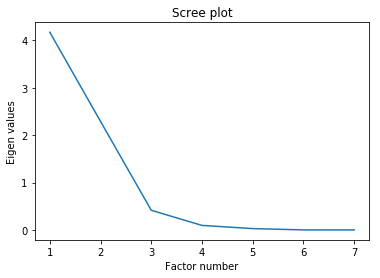

In [57]:
#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

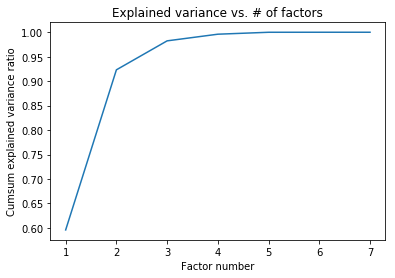

In [58]:
#cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

Deux facteurs font + de 90% de l'information, donc on selectionne ceux la

In [59]:
bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [60]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.171782  2.592857
1    2.290457  1.592857
2    0.414562  1.092857
3    0.095174  0.759524
4    0.027677  0.509524
5    0.000338  0.309524
6    0.000010  0.142857


## Graphe des individus

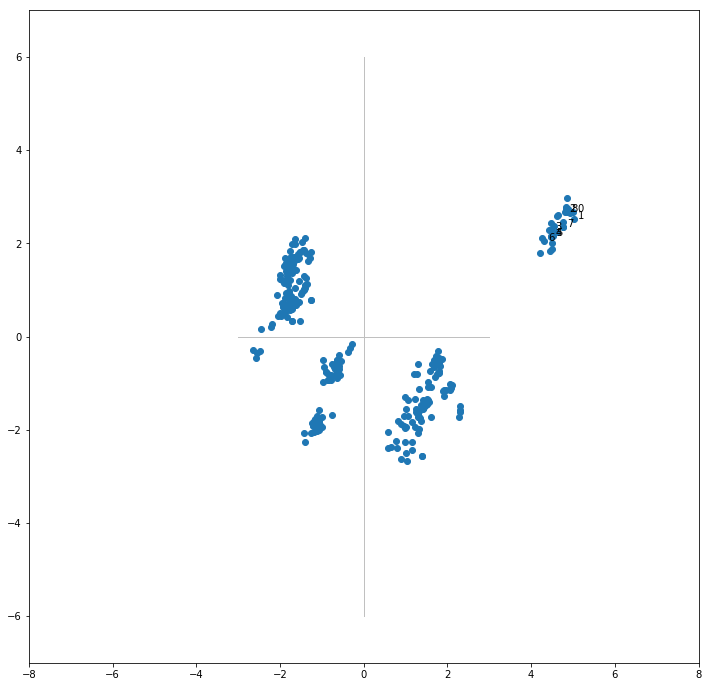

In [61]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,8) #même limites en abscisse
axes.set_ylim(-7,7) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(9):
     plt.annotate(df.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-3,3],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [62]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':df.index,'d_i':di}))

      ID        d_i
0      0  32.384714
1      1  31.816500
2      2  30.259495
3      3  25.246035
4      4  24.771480
5      5  25.077641
6      6  22.924906
7      7  28.479278
8      8  30.796560
9      9  31.246304
10    10  30.968357
11    11  31.465651
12    12  27.955068
13    13  24.905632
14    14  24.543614
15    15  29.083041
16    16  23.473236
17    17  21.307950
18    18  24.000401
19    19  26.495317
20    20  32.460159
21    21  31.061237
22    22  25.140775
23    23  22.742470
24    24  24.679827
25    25  26.355603
26    26  28.353764
27    27  25.989494
28    28  28.207181
29    29   4.866932
..   ...        ...
270  270   1.858679
271  271   1.686976
272  272   1.532336
273  273   2.193012
274  274   0.986936
275  275   1.194202
276  276   0.978920
277  277   1.946297
278  278   0.906055
279  279   1.712984
280  280   1.432553
281  281   1.144675
282  282   0.981737
283  283   1.644188
284  284   0.294823
285  285   1.510828
286  286   0.870052
287  287   0.950805


In [63]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.775166  0.221654
1      1  0.793240  0.201070
2      2  0.763141  0.236246
3      3  0.791285  0.206819
4      4  0.807292  0.188198
5      5  0.809216  0.187422
6      6  0.812318  0.184578
7      7  0.794864  0.194423
8      8  0.765258  0.233433
9      9  0.773565  0.226193
10    10  0.756748  0.241828
11    11  0.760368  0.239033
12    12  0.760472  0.237973
13    13  0.784961  0.210871
14    14  0.812924  0.185352
15    15  0.776918  0.209289
16    16  0.841775  0.142414
17    17  0.828656  0.152307
18    18  0.842563  0.148214
19    19  0.801259  0.188545
20    20  0.726831  0.271077
21    21  0.748778  0.250015
22    22  0.812044  0.185997
23    23  0.795698  0.198451
24    24  0.816775  0.165006
25    25  0.782608  0.214938
26    26  0.757397  0.240218
27    27  0.768395  0.227940
28    28  0.800002  0.197615
29    29  0.711744  0.048507
..   ...       ...       ...
270  270  0.402630  0.457151
271  271  0.475751  0.349523
272  272  0.57

In [141]:
#contributions aux axes
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(300*eigval[j])

print(pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.020058  0.010447
1      1  0.020166  0.009310
2      2  0.018451  0.010404
3      3  0.015962  0.007599
4      4  0.015979  0.006785
5      5  0.016215  0.006840
6      6  0.014880  0.006158
7      7  0.018088  0.008058
8      8  0.018831  0.010462
9      9  0.019313  0.010286
10    10  0.018725  0.010899
11    11  0.019117  0.010946
12    12  0.016986  0.009682
13    13  0.015621  0.007643
14    14  0.015942  0.006621
15    15  0.018054  0.008858
16    16  0.015788  0.004865
17    17  0.014108  0.004723
18    18  0.016158  0.005177
19    19  0.016963  0.007270
20    20  0.018851  0.012806
21    21  0.018584  0.011302
22    22  0.016312  0.006805
23    23  0.014459  0.006568
24    24  0.016107  0.005926
25    25  0.016481  0.008244
26    26  0.017159  0.009912
27    27  0.015957  0.008621
28    28  0.018031  0.008112
29    29  0.002768  0.000344
..   ...       ...       ...
270  270  0.000598  0.001237
271  271  0.000641  0.000858
272  272  0.00

In [65]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 6.47093729e-02  3.78760904e-01  4.46665915e-01  4.71889526e-01
   4.35702887e-01 -4.24913712e-01  2.44487304e-01]
 [-6.28275866e-01 -2.69706650e-01  2.34379085e-01 -1.10990417e-01
   2.01661652e-01  3.20312078e-01  5.67457559e-01]
 [-4.21668945e-01  7.46027442e-01 -1.99308714e-01  5.62726863e-02
  -4.55168874e-01  5.22365058e-02  1.13315588e-01]
 [-2.20721584e-01 -1.05931982e-02 -5.07042158e-01  5.52398549e-01
   4.46276890e-01  3.34339481e-01 -2.79263154e-01]
 [-6.47029345e-03 -3.87982788e-01  1.73367634e-01  6.70885701e-01
  -6.02614079e-01  7.43689883e-03  7.80031747e-02]
 [ 4.46449902e-01 -1.71520299e-04 -5.25402868e-01  5.88609281e-02
   3.13098518e-03 -5.08853524e-04  7.21913853e-01]
 [ 4.18569035e-01  2.76764643e-01  3.77671525e-01  5.60214003e-02
  -5.24323817e-04  7.76067911e-01  1.20598098e-02]]


In [66]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [68]:
#corrélation des variables avec les axes
corvar = np.zeros((7,7))
for k in range(7):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 1.32168508e-01 -9.50848850e-01 -2.71497942e-01 -6.80933161e-02
  -1.07642463e-03  8.20313706e-03  1.29139098e-03]
 [ 7.73616888e-01 -4.08180979e-01  4.80341077e-01 -3.26803560e-03
  -6.45464124e-02 -3.15153954e-06  8.53888687e-04]
 [ 9.12312469e-01  3.54715333e-01 -1.28327937e-01 -1.56424131e-01
   2.88421527e-02 -9.65383064e-03  1.16521186e-03]
 [ 9.63831544e-01 -1.67975751e-01  3.62320221e-02  1.70416723e-01
   1.11611305e-01  1.08151947e-03  1.72840141e-04]
 [ 8.89920550e-01  3.05199930e-01 -2.93067379e-01  1.37677851e-01
  -1.00253357e-01  5.75291885e-05 -1.61767114e-06]
 [-8.67883723e-01  4.84768536e-01  3.36332661e-02  1.03144801e-01
   1.23723308e-03 -9.34975052e-06  2.39436513e-03]
 [ 4.99363860e-01  8.58804861e-01  7.29599592e-02 -8.61535778e-02
   1.29769290e-02  1.32645528e-02  3.72075533e-05]]


In [69]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

       id     COR_1     COR_2
0    mois  0.132169 -0.950849
1    prot  0.773617 -0.408181
2     fat  0.912312  0.354715
3     ash  0.963832 -0.167976
4  sodium  0.889921  0.305200
5    carb -0.867884  0.484769
6     cal  0.499364  0.858805


## Cercle de correlation des 2 premiers axes

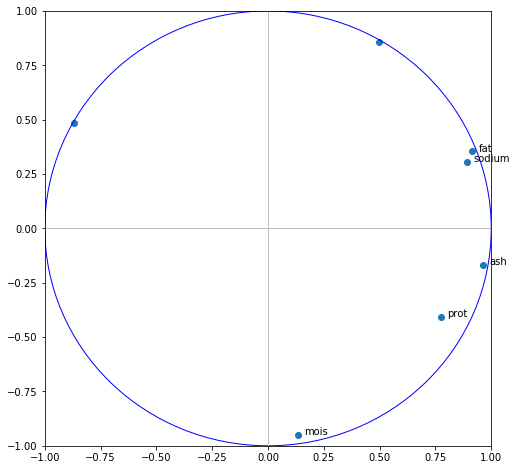

In [70]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

Le modele est representatif car tout les points sont proche du cercle, cela peut s'expliquer par le tres fort pourcentage de nos deux composantes.



# Question 4-5-6:  CAH


In [142]:
Z

array([[2.90000000e+01, 3.00000000e+01, 2.83314318e+00, 2.00000000e+00],
       [1.10000000e+01, 1.30000000e+01, 2.83706493e+00, 2.00000000e+00],
       [5.70000000e+01, 7.60000000e+01, 2.94119922e+00, 2.00000000e+00],
       ...,
       [5.87000000e+02, 5.89000000e+02, 4.43322730e+03, 2.88000000e+02],
       [5.86000000e+02, 5.90000000e+02, 5.15440156e+03, 2.94000000e+02],
       [5.88000000e+02, 5.91000000e+02, 1.21436273e+04, 2.97000000e+02]])

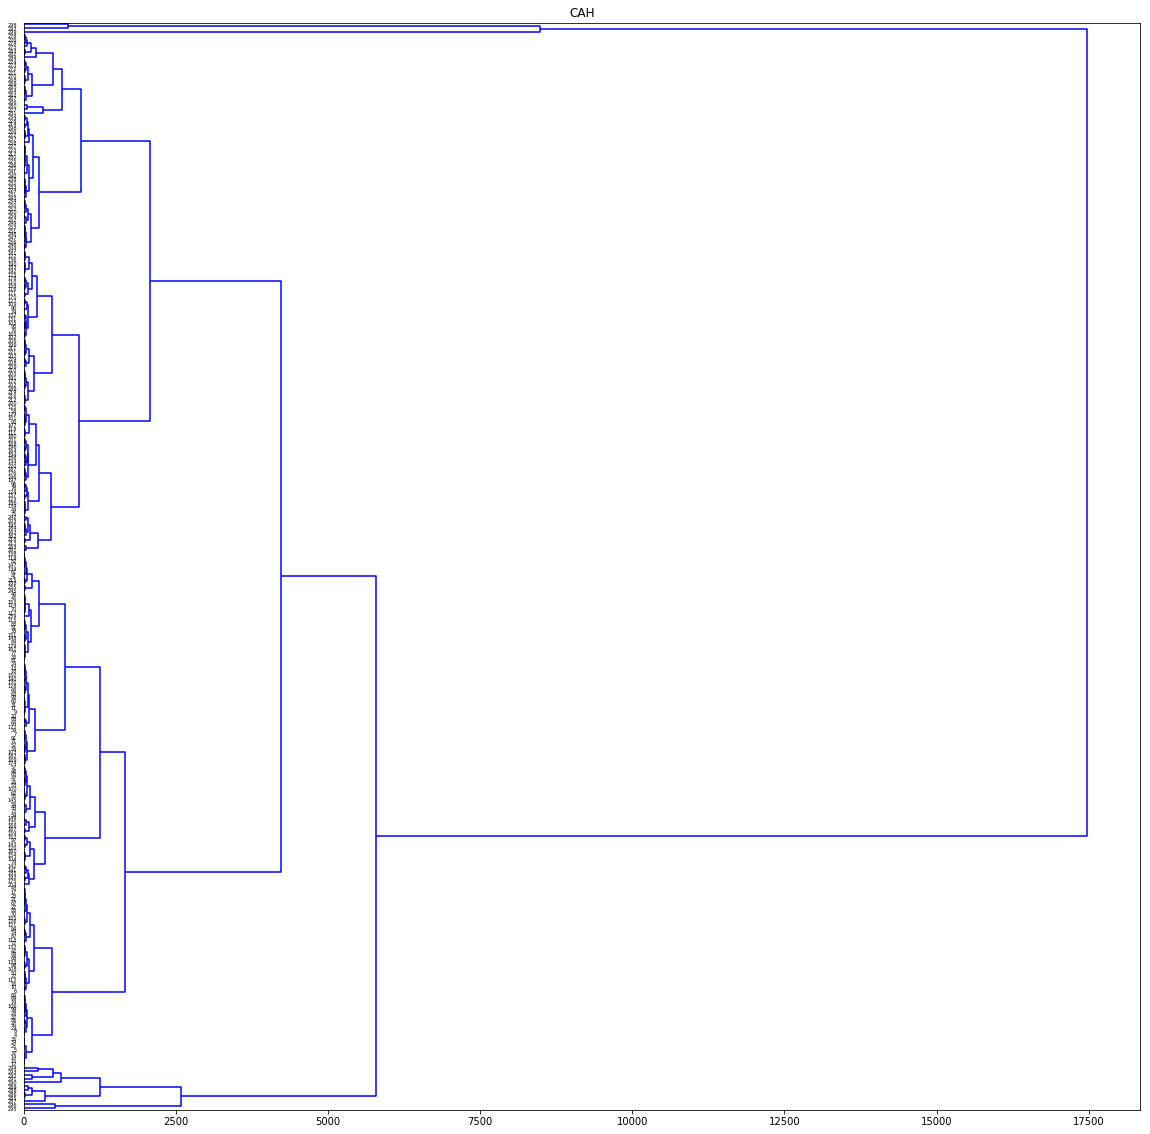

In [146]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(Z,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.figure(figsize=(20,20))
plt.title("CAH")
dendrogram(Z,labels=df.index,orientation='right',color_threshold=0)
plt.show()

Le dendogram est un peu brouillon cra il y a beaucoup de valeurs, c'est pourquoi je vais couper ce dendogramme en petit groupes.
Je pense que le couper en 4 est le plus pertinent car nous voyons sur le graph des induvidu 4 groupes différents. De plus, on peut le voir sur le premier dendograme.

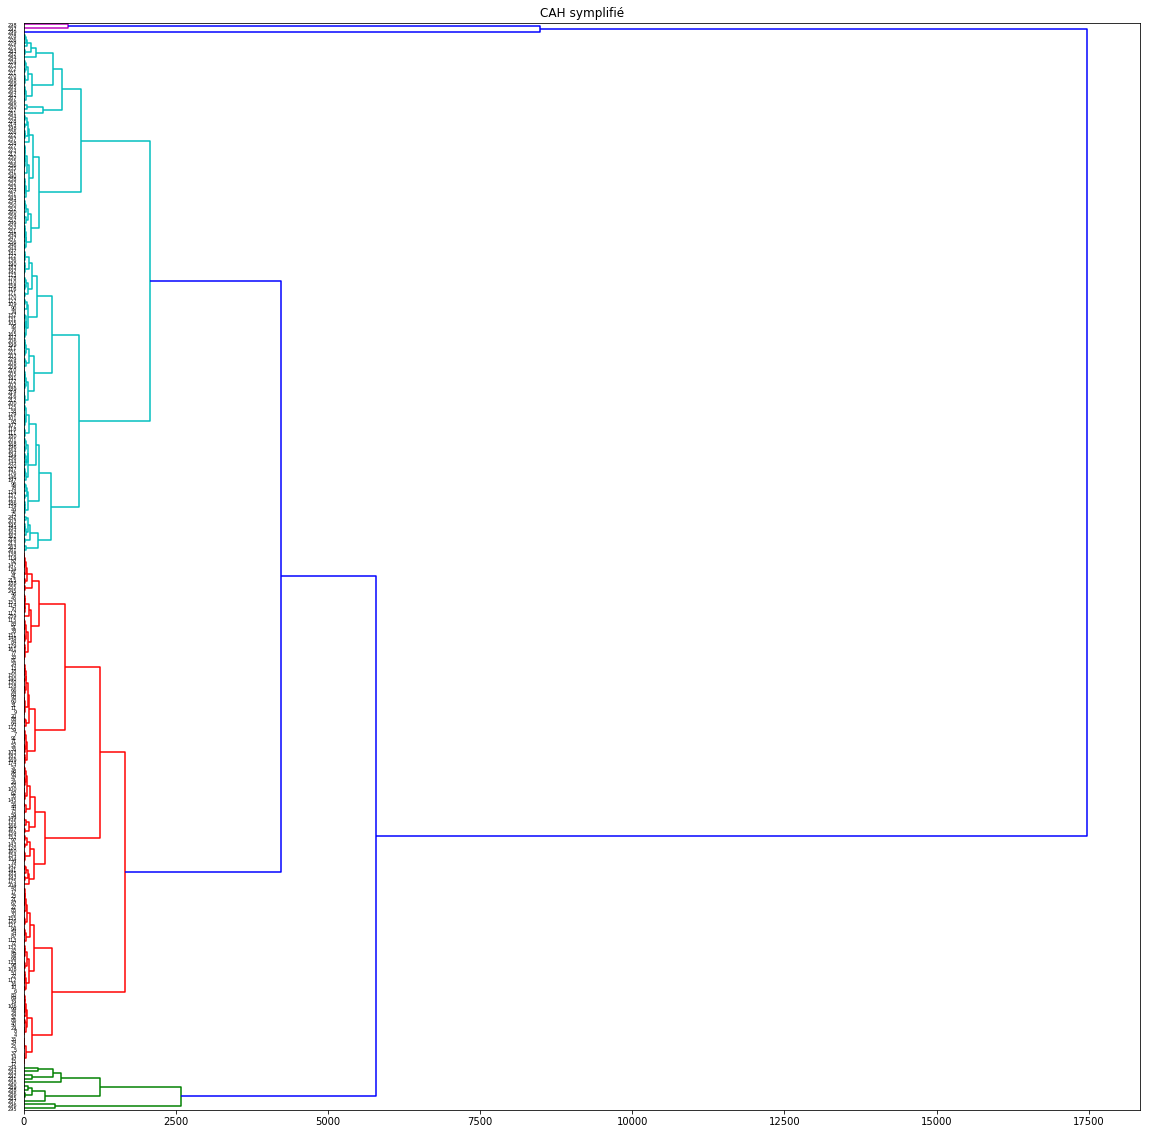

In [147]:
#matérialisation pour 4 groupes avec hauteur t = 3500
plt.figure(figsize=(20,20))
plt.title('CAH symplifié')
dendrogram(Z,labels=df.index,orientation='right',color_threshold=3500)
plt.show()



In [148]:
#découpage à la hauteur t = 3500 ==> identifiants de 4 groupes obtenus

groupes_cah = fcluster(Z,t=3500,criterion='distance')
print(groupes_cah)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2
 3 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 3 2 2 2 2 3 3 2 2 3 2 3 2 3 3 3 2 2 2
 2 3 2 3 2 2 2 3 3 3 3 2 3 2 3 2 3 2 2 2 2 3 3 2 3 2 2 2 2 3 2 3 2 2 2 2 2
 3 2 2 2 3 2 3 2 2 2 3 3 3 3 2 2 3 2 3 3 3 3 2 2 3 2 3 2 3 3 2 3 3 2 3 3 2
 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 4 5]


In [149]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(df.index[idg],groupes_cah[idg]))


      0
1   284
1   292
1   291
1   290
1   289
1   288
1   287
1   286
1   285
1   283
1   282
1   281
2   113
2   111
2     0
2   109
2   115
2   110
2   116
2   130
2   122
2   124
2   126
2   128
2   129
2   108
2   117
2   104
2    94
2   100
..  ...
3   206
3   207
3   208
3   209
3   210
3   212
3   204
3   161
3   193
3   191
3   166
3   167
3   168
3   169
3   172
3   174
3   192
3   177
3   176
3   180
3   182
3   183
3   185
3   186
3   188
3   190
3   179
4   294
4   293
5   295

[296 rows x 1 columns]


In [150]:
d={'brand':data1.brand.iloc[idk],'Groupe':kmeans.labels_[idk]}
datatot=pd.DataFrame(data=d)
datatot

brand  Groupe
0       A       0
11      A       0
10      A       0
95      D       0
15      A       0
16      A       0
17      A       0
18      A       0
19      A       0
5       A       0
12      A       0
9       A       0
22      A       0
23      A       0
24      A       0
25      A       0
26      A       0
27      A       0
7       A       0
20      A       0
14      A       0
21      A       0
48      B       0
6       A       0
47      B       0
30      B       0
31      B       0
32      B       0
33      B       0
34      B       0
..    ...     ...
291     J       3
67      C       3
259     I       3
69      C       3
49      B       3
267     I       3
271     J       3
272     J       3
273     J       3
274     J       3
275     J       3
73      C       3
277     J       3
278     J       3
279     J       3
280     J       3
255     I       3
281     J       3
283     J       3
284     J       3
285     J       3
286     J       3
287     J       3
288     J       3
289     J       3
290     J       3
245     I       3
269     J       3
282     J       3
294     J       3

[296 rows x 2 columns]

In [151]:
datatot['brand'][datatot['Groupe']==0].value_counts()

D    32
B    28
E    28
A    27
F    26
C    20
G    13
I     7
H     5
J     5
Name: brand, dtype: int64

In [152]:
datatot['brand'][datatot['Groupe']==1].value_counts()

G    1
Name: brand, dtype: int64

In [153]:
datatot['brand'][datatot['Groupe']==2].value_counts()

H    4
Name: brand, dtype: int64

In [154]:
datatot['brand'][datatot['Groupe']==3].value_counts()

H    24
J    23
I    22
G    15
C     7
F     4
B     3
A     2
Name: brand, dtype: int64

On voit que certaine marque ce retrouve dans deux groupe différent, cela veut dire que notre classification n'est pas bonne pour toute les marques.
Nous allons voir si ces problemes continue avec la methode de k-means.

## K-MEANS

In [155]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus
kmeans.fit(Z)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(df.index[idk],kmeans.labels_[idk]))



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 2 2 2 1]
      0
0     0
0   181
0   182
0   183
0   184
0   185
0   186
0   187
0   188
0   189
0   190
0   191
0   192
0   193
0   194
0   195
0   196
0   197
0   211
0   210
0   209
0   208
0   207
0   206
0   180
0   205
0   203
0   202
0   201
0   200
..  ...
0    79
0    88
0    83
0    90
0   104
0   103
0    89
0   101
0   100
0    99
0    98
0   102
0    96
0    95
0    94
0    97
0    93
0    92
0

In [156]:
d={'brand':data1.brand.iloc[idk],'Groupe':kmeans.labels_[idk]}
datatot=pd.DataFrame(data=d)
datatot

brand  Groupe
0       A       0
62      C       0
63      C       0
64      C       0
65      C       0
66      C       0
67      C       0
68      C       0
69      C       0
60      C       0
13      A       0
295     J       0
293     J       0
292     J       0
291     J       0
294     J       0
187     G       0
265     I       0
132     E       0
252     I       0
253     I       0
266     I       0
254     I       0
256     I       0
61      C       0
257     I       0
259     I       0
260     I       0
261     I       0
262     I       0
..    ...     ...
155     F       0
164     F       0
158     F       0
170     F       0
36      B       0
35      B       0
165     F       0
33      B       0
32      B       0
31      B       0
30      B       0
34      B       0
94      D       0
147     F       0
96      D       0
29      B       0
159     F       0
172     F       0
171     F       0
229     H       1
219     H       2
221     H       2
220     H       2
226     H       3
225     H       3
224     H       3
223     H       3
222     H       3
228     H       3
227     H       3

[295 rows x 2 columns]

In [157]:
datatot['brand'][datatot['Groupe']==0].value_counts()

D    32
B    31
F    30
A    29
I    29
G    28
J    28
E    28
C    27
H    22
Name: brand, dtype: int64

In [158]:
datatot['brand'][datatot['Groupe']==1].value_counts()

H    1
Name: brand, dtype: int64

In [159]:
datatot['brand'][datatot['Groupe']==2].value_counts()

H    3
Name: brand, dtype: int64

In [160]:
datatot['brand'][datatot['Groupe']==3].value_counts()

H    7
Name: brand, dtype: int64

Certaine marques sont dans deux groupes ici aussi

## Question 7

Il y a un probleme dasn la classification, il est donc judicieux d'enlever les groupes qui sembles faux pour refaire une ACP. Cela representes les erreurs expérimentals qui peuvent etre comprehensible

# Partie 2

In [161]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [162]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0

### Creation du modele


In [163]:
# model creation
model = tf.keras.models.Sequential()

### Ajout de couche de neureones

In [164]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Extraction

In [196]:
x_train, x_test, y_train, y_test = train_test_split(data2, labels, test_size=0.2)

## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [185]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [186]:
labels = np.array(data2['RESULTAT'].values)


In [187]:
colonne = data2.columns
colonne = colonne[0:7]
colonne


Index(['NBG', 'GC', 'TD', 'EPC', 'IS', 'IMC', 'DG'], dtype='object')

In [188]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, activation="relu"))
model.add(tf.keras.layers.Dense(18, activation="relu"))
model.add(tf.keras.layers.Dense(7, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))
model_output = model.predict(np.array(data2[colonne]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])
print(index_max(list(model_output[0])))



[[0.9998864 1.       ]
 [0.9851231 1.       ]
 [1.        1.       ]
 ...
 [1.        1.       ]
 [0.9999974 1.       ]
 [0.9886864 1.       ]]
Found :  1
Should be :  1
1


## Entrainement

In [198]:
history = model.fit(data2, labels, epochs=10, validation_split=0.2)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=     NBG   GC  TD  EPC   IS   IMC     DG  AGE  RESULTAT
0      6  148  72   35    0  33.6  0.627   50         1
1      1   85  66   29    0  26.6  0.351   31         0
2      8  183  64    0    0  23.3  0.672   32         1
3      1   89  66   23   94  28.1  0.167   21         0
4      0  137  40   35  168  43.1  2.288   33         1
5      5  116  74    0    0  25.6  0.201   30         0
6      3   78  50   32   88  31.0  0.248   26         1
7     10  115   0    0    0  35.3  0.134   29         0
8      2  197  70   45  543  30.5  0.158   53         1
9      8  125  96    0    0   0.0  0.232   54         1
10     4  110  92    0    0  37.6  0.191   30         0
11    10  168  74    0    0  38.0  0.537   34         1
12    10  139  80    0    0  27.1  1.441   57         0
13     1  189  60   23  846  30.1  0.398   59         1
14     5  166  72   19  175  25.8  0.587   51         1
15     7  100   0    0    0  30.0  0.484   32         1
16     0  118  84   47  230  45.8  0.551   31         1
17     7  107  74    0    0  29.6  0.254   31         1
18     1  103  30   38   83  43.3  0.183   33         0
19     1  115  70   30   96  34.6  0.529   32         1
20     3  126  88   41  235  39.3  0.704   27         0
21     8   99  84    0    0  35.4  0.388   50         0
22     7  196  90    0    0  39.8  0.451   41         1
23     9  119  80   35    0  29.0  0.263   29         1
24    11  143  94   33  146  36.6  0.254   51         1
25    10  125  70   26  115  31.1  0.205   41         1
26     7  147  76    0    0  39.4  0.257   43         1
27     1   97  66   15  140  23.2  0.487   22         0
28    13  145  82   19  110  22.2  0.245   57         0
29     5  117  92    0    0  34.1  0.337   38         0
..   ...  ...  ..  ...  ...   ...    ...  ...       ...
738    2   99  60   17  160  36.6  0.453   21         0
739    1  102  74    0    0  39.5  0.293   42         1
740   11  120  80   37  150  42.3  0.785   48         1
741    3  102  44   20   94  30.8  0.400   26         0
742    1  109  58   18  116  28.5  0.219   22         0
743    9  140  94    0    0  32.7  0.734   45         1
744   13  153  88   37  140  40.6  1.174   39         0
745   12  100  84   33  105  30.0  0.488   46         0
746    1  147  94   41    0  49.3  0.358   27         1
747    1   81  74   41   57  46.3  1.096   32         0
748    3  187  70   22  200  36.4  0.408   36         1
749    6  162  62    0    0  24.3  0.178   50         1
750    4  136  70    0    0  31.2  1.182   22         1
751    1  121  78   39   74  39.0  0.261   28         0
752    3  108  62   24    0  26.0  0.223   25         0
753    0  181  88   44  510  43.3  0.222   26         1
754    8  154  78   32    0  32.4  0.443   45         1
755    1  128  88   39  110  36.5  1.057   37         1
756    7  137  90   41    0  32.0  0.391   39         0
757    0  123  72    0    0  36.3  0.258   52         1
758    1  106  76    0    0  37.5  0.197   26         0
759    6  190  92    0    0  35.5  0.278   66         1
760    2   88  58   26   16  28.4  0.766   22         0
761    9  170  74   31    0  44.0  0.403   43         1
762    9   89  62    0    0  22.5  0.142   33         0
763   10  101  76   48  180  32.9  0.171   63         0
764    2  122  70   27    0  36.8  0.340   27         0
765    5  121  72   23  112  26.2  0.245   30         0
766    1  126  60    0    0  30.1  0.349   47         1
767    1   93  70   31    0  30.4  0.315   23         0

[768 rows x 9 columns]

### Utiliser ce modèle et comparer

In [189]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)